In [15]:
import json

with open("./data/turn_times.json") as f:
    turn_times = json.load(f)
    
with open("./data/game_results.json") as f:
    game_results = json.load(f)
with open("./data/branching_factors.json") as f:
    branching_factors = json.load(f)
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import cm
import numpy


Average branching factor: 13.609922023610729
LinregressResult(slope=-0.04066811124829, intercept=14.721318311284184, rvalue=-0.29923141097504424, pvalue=0.0, stderr=0.00015626885865435418)


Text(0.5,1,'Branching factor over turn number (20,000 games)')

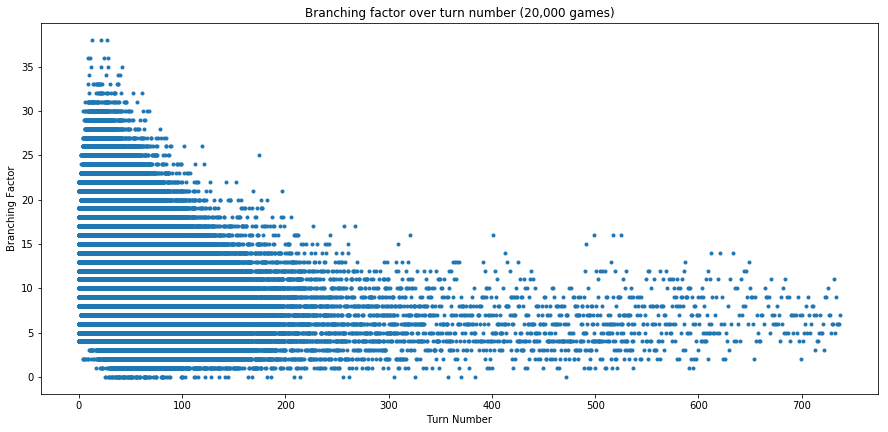

In [2]:
plt.subplots(figsize=(15,15))
plt.subplot(2, 1, 1)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())

x_plots = []
y_plots = []
for turn_number, branching_factor in branching_factors:
    x_plots.append(turn_number)
    y_plots.append(branching_factor)
plt.plot(x_plots, y_plots, linestyle='', marker='.')
print("Average branching factor: " + str(numpy.mean(y_plots)))
from scipy.stats import linregress
slope, intercept, rvalue, pvalue, stderr = linregress(x_plots, y_plots)
print(linregress(x_plots, y_plots))
plt.xlabel('Turn Number')
plt.ylabel('Branching Factor')
plt.title('Branching factor over turn number (20,000 games)')

Because relationship doesn't seemto be linear, pearson coeffcient isn't a veyr good measure
Apparently you could do a association measure with GAM? 
https://stats.stackexchange.com/questions/35893/how-do-i-test-a-nonlinear-association
Doesn't see worth it

In [3]:
low_turn_numbers = []
for turn_number, _ in branching_factors:
    low_turn_numbers.append(turn_number)
print("Average branching factor for turns under 50: " + str(numpy.mean(low_turn_numbers)))

Average branching factor for turns under 50: 27.328446135304283


Average branching factor of 13 is significantly lower then chess, but that includes unrealisticly long (i.e. stupid) games
Chess is 35.
27 for games under 50 turns is higher. But could we brute force early move and win that way?

Average time (microsecond), randomMove: 22.2955
Average time (microsecond), executeMove: 4.9563
Average time (microsecond), unsafeExecuteMove: 0.9040
Average time (microsecond), cutExecuteMove: 0.1639


Text(0.5,1,'AI turn time')

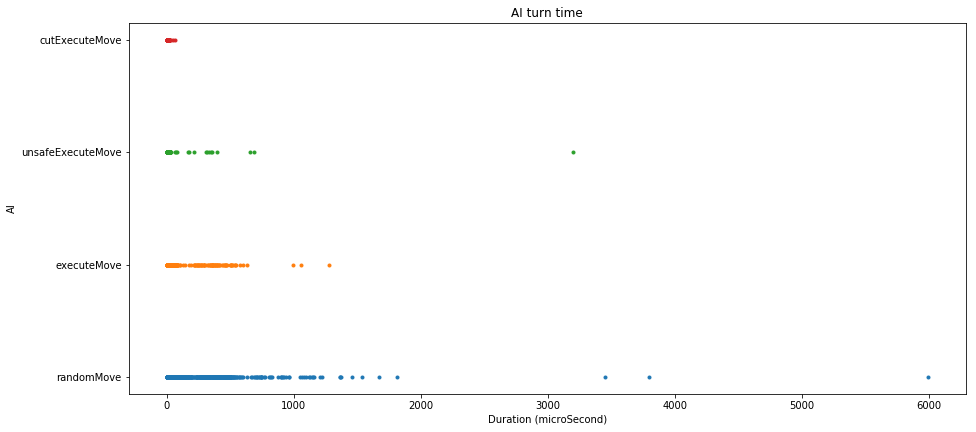

In [14]:
with open("./data/move_times.json") as f:
    move_times = json.load(f)
    
plt.subplots(figsize=(15,15))
plt.subplot(2, 1, 1)
    
for ai, times in move_times.items():
    print("Average time (microsecond), {}: {:.4f}".format(ai, numpy.mean(times)/1000))
    x_plots = []
    y_plots = []
    for time in times:
        x_plots.append(time/1000)
        y_plots.append(ai)
    plt.plot(x_plots, y_plots, linestyle='', marker='.')
plt.xlabel('Duration (microSecond)')
plt.ylabel('AI')
plt.title('AI turn time')
